In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScale
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier 

from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# reading dataset from csv
stat = 'abnormal normal'.split()
data_origin = pd.read_csv('data.csv')
data = data_origin.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.498098,0.010669,1355.627582,1632.530756,2984.921626,0.057413,-357.065765,169.752792,-46.861694,67.454842,...,-6.062041,7.387231,-9.862085,9.058959,-7.534760,6.535229,-7.786106,0.841553,-5.342541,abnormal
1,0.547494,0.005378,2092.622402,1828.059500,4161.029209,0.138394,-377.315643,148.194016,-77.071838,70.391685,...,-6.725280,8.314228,-12.819753,10.248579,-13.006725,10.588124,-9.434364,8.421089,-1.956536,abnormal
2,0.199319,0.010700,1204.431156,1604.841989,2387.287807,0.043510,-406.926331,171.354568,-22.173464,48.847950,...,-14.506110,-4.364563,-16.434780,5.844230,-15.634045,10.232363,-0.303717,11.974640,2.435613,abnormal
3,0.630616,0.009863,1470.761577,1672.928265,3238.448863,0.070529,-352.411194,169.718460,-56.841694,66.465225,...,-2.550473,11.814772,-10.915584,6.584901,-11.403391,8.936230,-5.264018,7.075547,-4.117052,abnormal
4,0.334657,0.009123,1375.252521,1677.441716,2785.252377,0.070988,-375.983185,176.464676,-42.045616,51.753513,...,4.838639,16.043678,-7.186187,12.683148,-15.059711,9.484856,-8.006330,9.391084,-2.548033,abnormal


In [3]:
sound_list = data.iloc[:, -1]
encoder = LabelEncoder()
y_origin = encoder.fit_transform(sound_list)
y = [1 if e == 0 else 0 for e in y_origin]
y = np.array(y)

In [4]:
# normalizing
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [5]:
# using SMOTE to upsample the minority class

counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 3562, 1: 1271})
Counter({1: 3562, 0: 3562})


In [6]:
# spliting of dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [7]:
x_train = X_train
x_test = X_test

In [8]:
model = SGDClassifier(loss='hinge',class_weight='balanced')
model.fit(x_train, y_train)

y_train_pred = model.decision_function(x_train)    
y_test_pred = model.decision_function(x_test) 

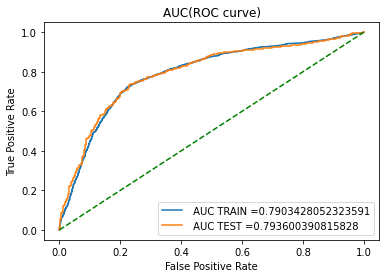

In [9]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()